In [7]:
import pandas as pd
import numpy as np
patents = pd.read_excel('datasets/patents_AGRI.xlsx')
patents['count'] = 1

patents['agricultur_patent'] = np.where( (patents['count_matches']==0), 0,1)
patents['agricultur_patent_yes'] = np.where( (patents['count_matches']==0), "no", "yes")

In [8]:
pd.set_option('display.max_columns', None)
patents.head(10)

,Unnamed: 0,Unnamed: 0.1,id,type,number,country,date,abstract,title,kind,num_claims,filename,withdrawn,matches,count_matches,count_unique_matches,date_str,link,count,agricultur_patent,agricultur_patent_yes
0,1631,6016105,9703275,utility,9703275,US,2017-07-11,Methods and systems are provided for monitorin...,Methods and systems for irrigation and climate...,B2,20,ipg170711.xml,0.0,'agricultural',2,1,20170711,https://worldwide.espacenet.com/publicationDet...,1,1,yes
1,1728,6141826,9829869,utility,9829869,US,2017-11-28,Methods and systems are provided for monitorin...,Methods and systems for irrigation and climate...,B2,17,ipg171128.xml,0.0,'agricultural',2,1,20171128,https://worldwide.espacenet.com/publicationDet...,1,1,yes
2,1921,2254970,5967085,utility,5967085,US,1999-10-19,A sea water well source is used to supply col...,Sea water well-driven heat exchange system cou...,A,10,pftaps19991019_wk42.zip,0.0,'agricultural',2,1,19991019,https://worldwide.espacenet.com/publicationDet...,1,1,yes
3,1362,6281213,9970208,utility,9970208,US,2018-05-15,An ecological system model for a self-sustaini...,Ecological system model for a self-sustaining ...,B2,4,ipg180515.xml,0.0,"'agriculture', 'agricultural'",2,1,20180515,https://worldwide.espacenet.com/publicationDet...,1,1,yes
4,489,5672878,9357718,utility,9357718,US,2016-06-07,A shell with a controllable indoor climate. Th...,Indoor farming device and method,B1,15,ipg160607.xml,0.0,'farming',1,1,20160607,https://worldwide.espacenet.com/publicationDet...,1,1,yes
5,188,5557354,9241451,utility,9241451,US,2016-01-26,A wireless system is provided for monitoring e...,Methods and systems for irrigation control,B2,40,ipg160126.xml,0.0,'agricultural',1,1,20160126,https://worldwide.espacenet.com/publicationDet...,1,1,yes
6,2459,1493493,5196510,utility,5196510,US,1993-03-23,A system or method for identifying and/or des...,Molecular recognition units,A,16,pftaps19930323_wk12.zip,0.0,'agriculture',1,1,19930323,https://worldwide.espacenet.com/publicationDet...,1,1,yes
7,2858,4786012,8465567,utility,8465567,US,2013-06-18,The present invention relates to a method for ...,Method for the production of humus- and nutrie...,B2,17,ipg130618.xml,0.0,'agricultural',1,1,20130618,https://worldwide.espacenet.com/publicationDet...,1,1,yes
8,1516,5893437,9579700,utility,9579700,US,2017-02-28,An analytical framework and modeling process f...,Measurement and modeling of salinity contamina...,B2,23,ipg170228.xml,0.0,'agricultural',1,1,20170228,https://worldwide.espacenet.com/publicationDet...,1,1,yes
9,223,5167828,8849461,utility,8849461,US,2014-09-30,A wireless system is provided for monitoring e...,Methods and systems for irrigation control,B2,40,ipg140930.xml,0.0,'agricultural',1,1,20140930,https://worldwide.espacenet.com/publicationDet...,1,1,yes


In [9]:
patents.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'type', 'number', 'country', 'date',
       'abstract', 'title', 'kind', 'num_claims', 'filename', 'withdrawn',
       'matches', 'count_matches', 'count_unique_matches', 'date_str', 'link',
       'count', 'agricultur_patent', 'agricultur_patent_yes'],
      dtype='object')

# Adjusting the dataset

#### Dates and status of the policy

In [14]:
patents.date = pd.to_datetime(patents.date)

In [15]:
type(patents.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
patents['First_year'] = pd.DatetimeIndex(patents['date']).year

# Plots
## patents per country

In [16]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

In [21]:
patents.country.unique()

array(['US'], dtype=object)

#### Dataset "Geography"

In [19]:
# dataset aggregated to country level
Geography=patents.groupby('kind').sum() # aggregate the data by country
Geography['kind'] = Geography.index # add rownames as columns
Geography['kind_with_agricultur_patent'] = np.where((Geography['agricultur_patent']>0), 1, 0)

# subset dataset with only agriculture laws
Geography_subset=Geography[Geography["agricultur_patent"]>0] 
Geography_subset=Geography_subset.sort_values(by=['agricultur_patent'], ascending=False)

Geography.head(10)

,Unnamed: 0,Unnamed: 0.1,num_claims,withdrawn,count_matches,count_unique_matches,date_str,count,agricultur_patent,kind,kind_with_agricultur_patent
kind,,,,,,,,,,,
A,785880,746486973,6371,0.0,3,433,8634278453,433,2,A,1
B1,782440,1798846887,8438,0.0,2,466,9371834307,466,2,B1,1
B2,3516636,10017454518,43378,5.0,15,2246,45167045979,2243,12,B2,1
E1,4619,20854092,65,0.0,0,3,60252255,3,0,E1,0
H1,3793,20737886,18,0.0,0,3,60171713,3,0,H1,0
P,10940,69357972,10,0.0,0,10,198856787,10,0,P,0
P2,43288,242295749,35,0.0,0,35,703148544,35,0,P2,0
P3,31775,180026129,26,0.0,0,26,522737072,26,0,P3,0


Types of patents: https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/definitions.html

#### Dataset "Geography"

#### Patents per country (all laws)

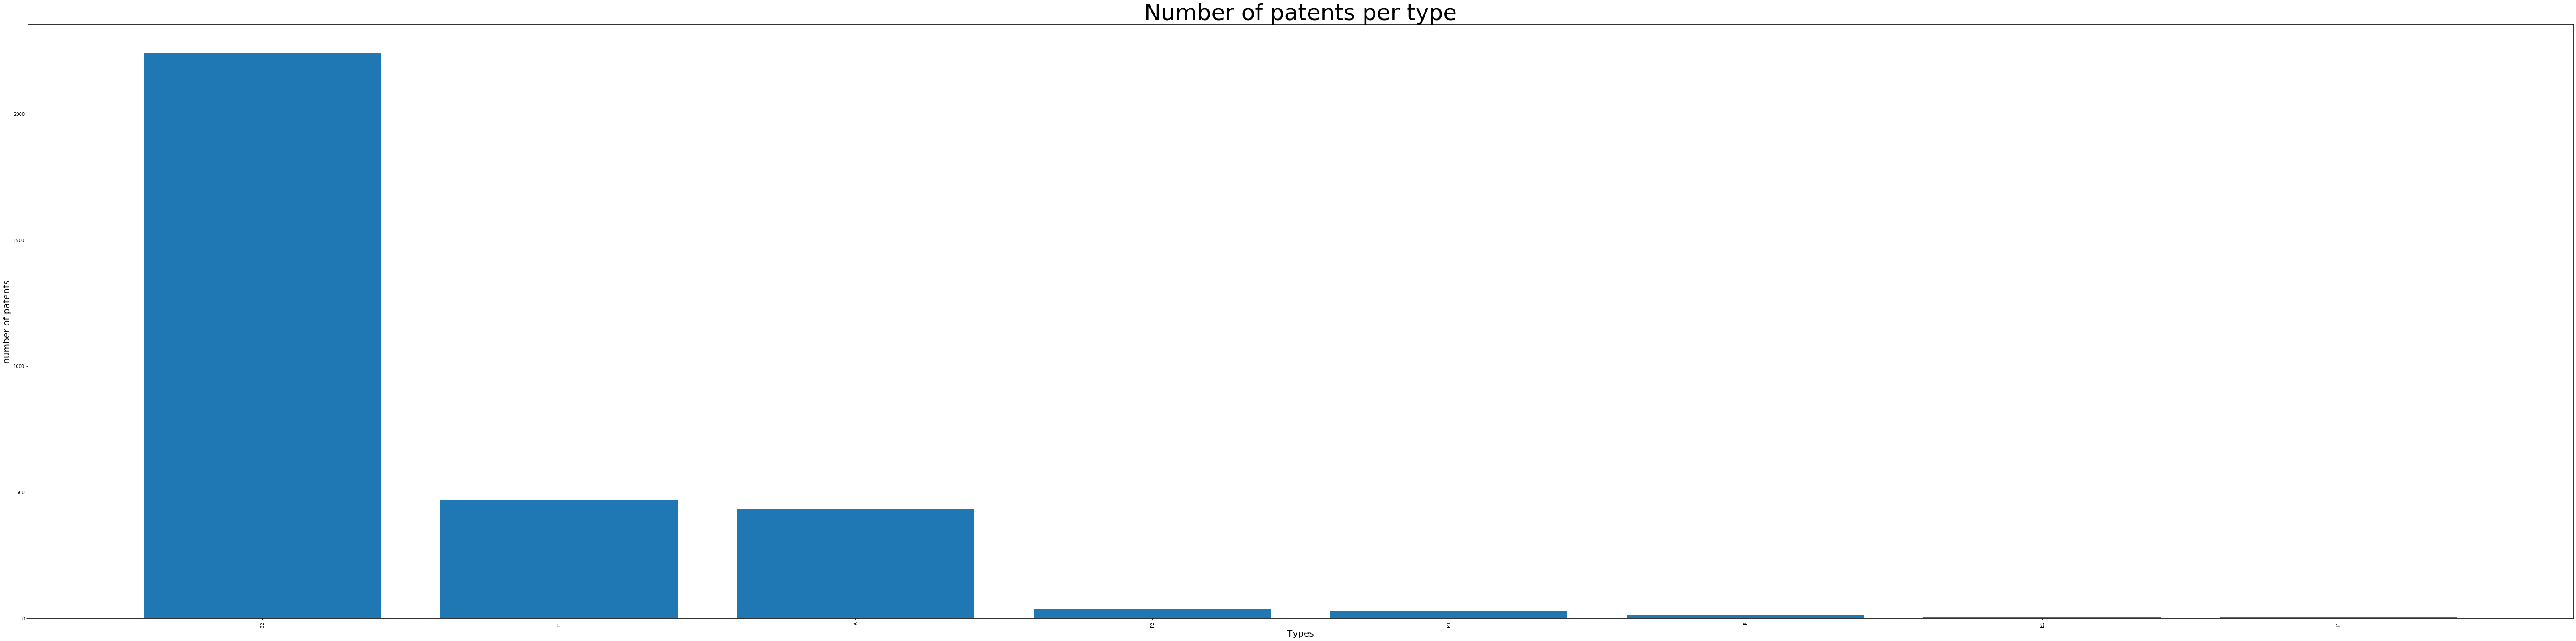

In [23]:
Geography=Geography.sort_values(by=['count'], ascending=False)

rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography['kind'].to_list()) # change column to list to use it for the plot
y_units = (Geography['count'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of patents per type', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('C:/Users/Lina_/Documents/GitHub/agritech-policy-data-analysis/Graphics/Laws_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot 


#### laws per country (only agriculture)

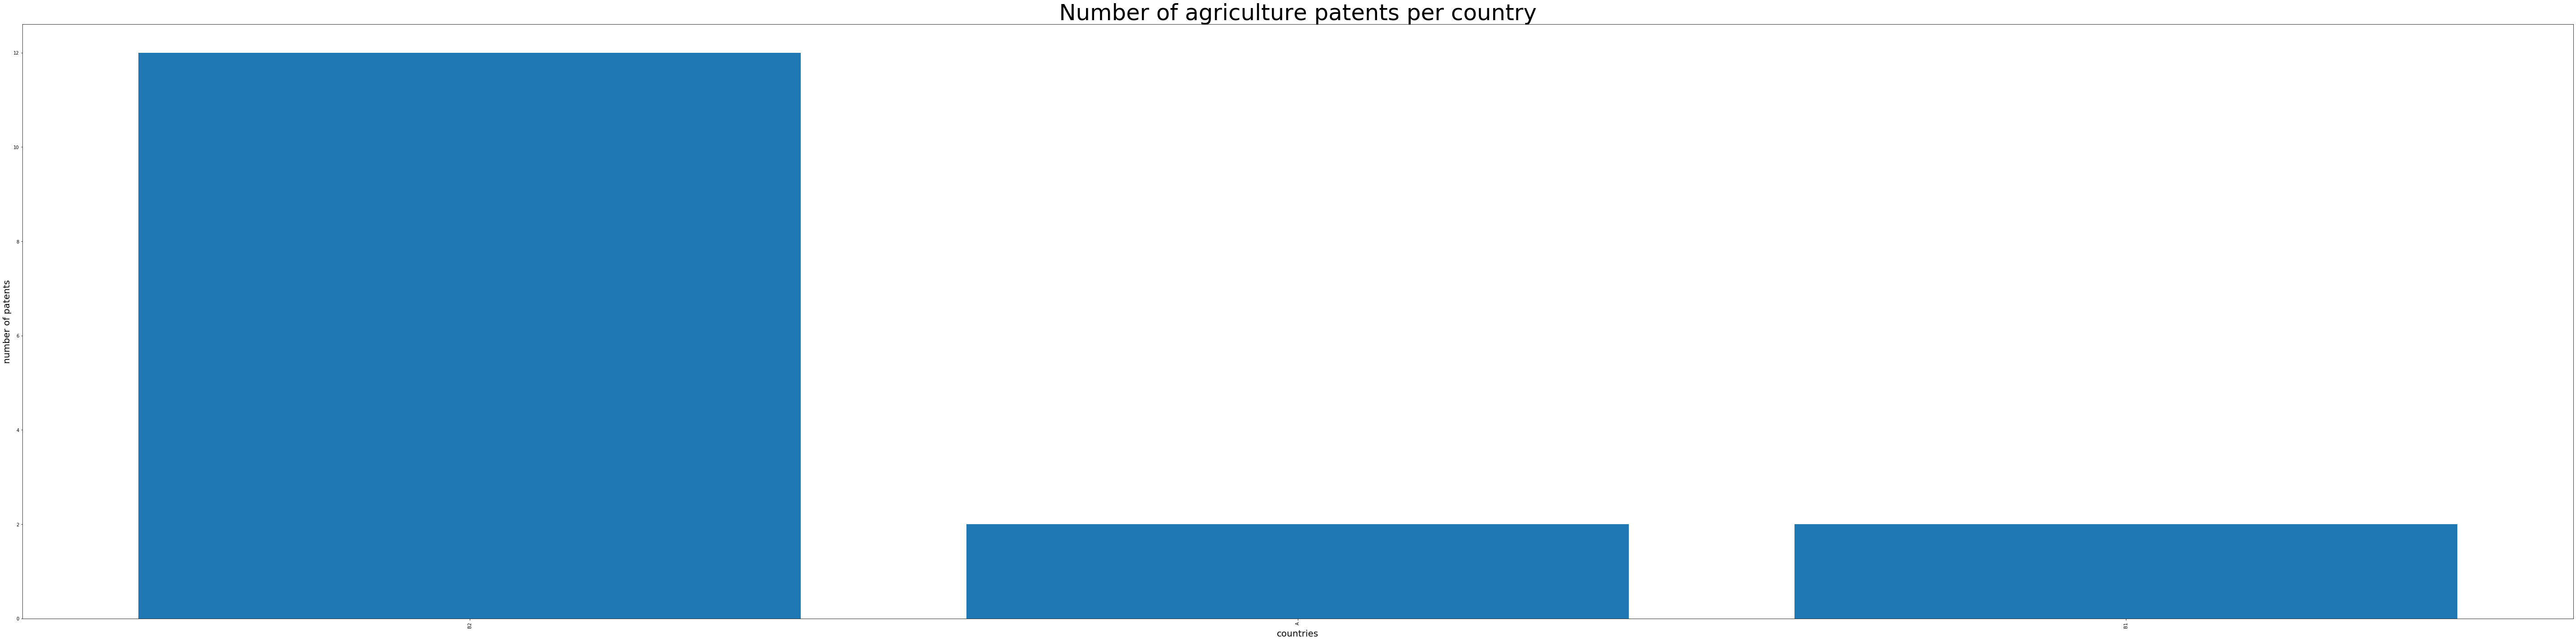

In [24]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography_subset['kind'].to_list()) # change column to list to use it for the plot
y_units = (Geography_subset['agricultur_patent'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of agriculture patents per country', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('C:/Users/Lina_/Documents/GitHub/agritech-policy-data-analysis/Graphics/Laws_agriculture_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all patents + agricultural patents per type combined

Text(0.5, 1.0, 'Number of Patents per type')

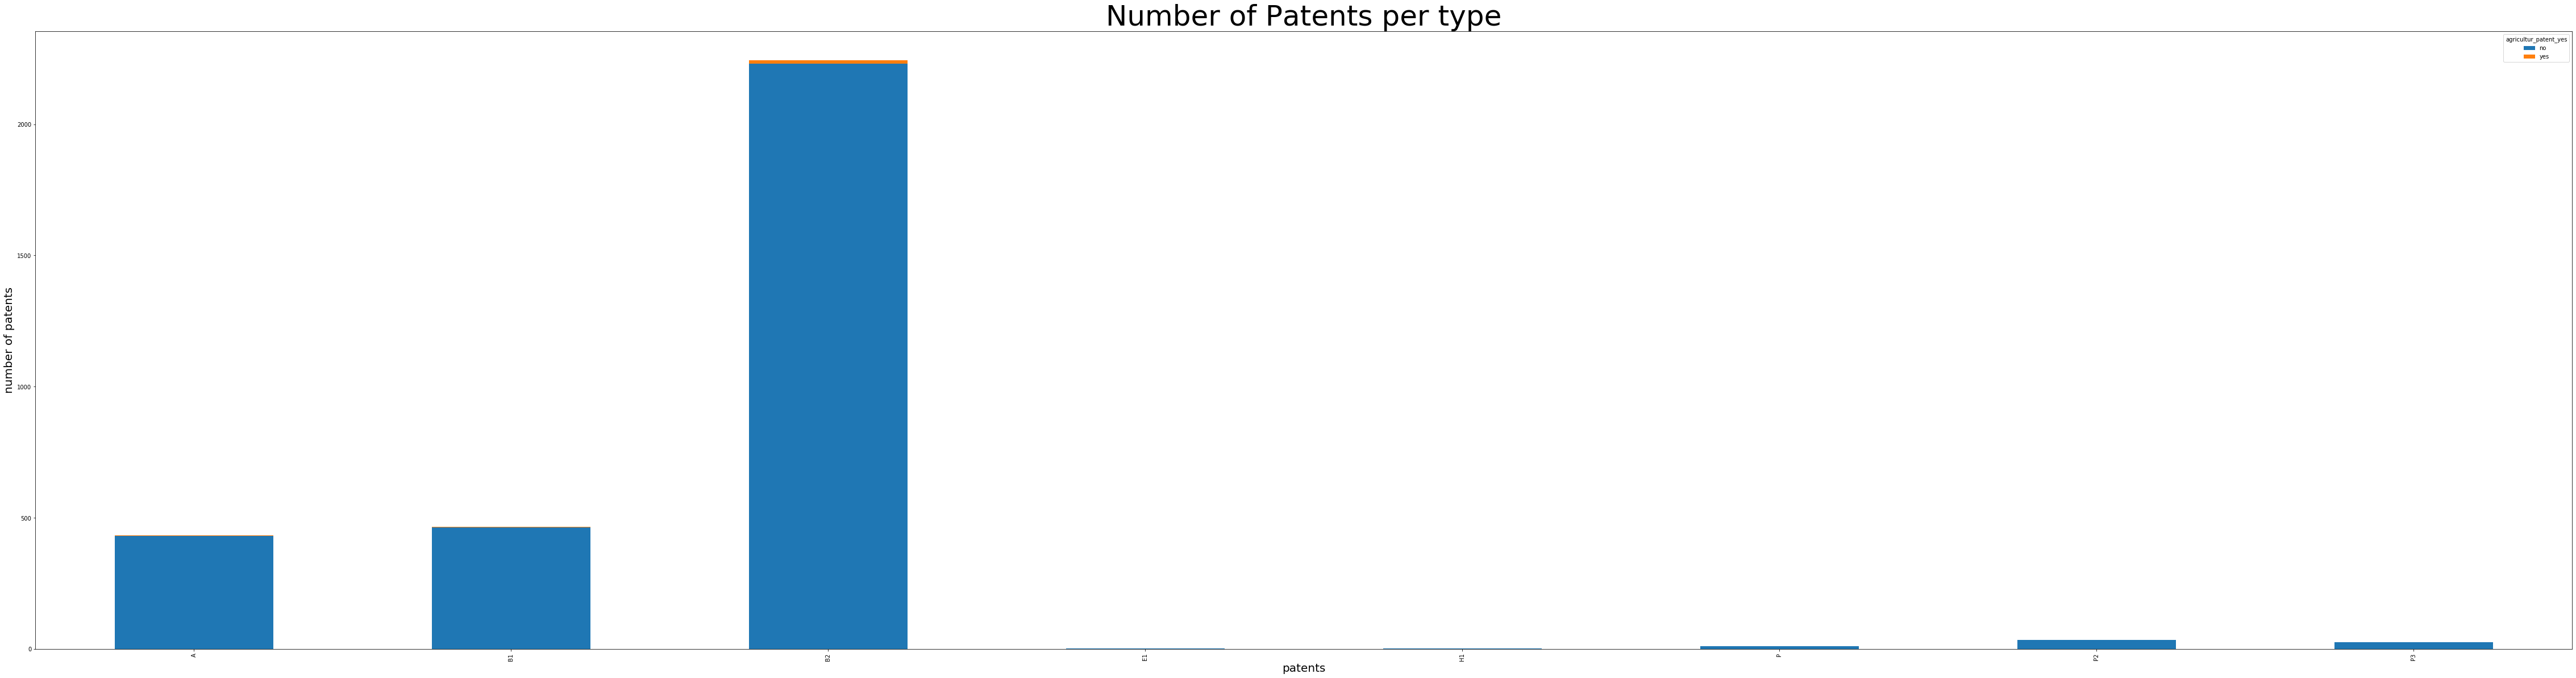

In [27]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

patents.groupby(['kind','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('patents', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of Patents per type', fontsize = 50)

#plt.savefig('C:/Users/Lina_/Documents/GitHub/agritech-policy-data-analysis/Graphics/Laws_divided_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### agricultural laws out of all laws ( 1 = agriculture law)

Text(0.5, 1.0, 'Total number of agriculture and other patents')

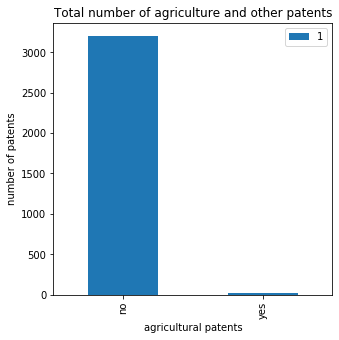

In [29]:
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

patents.groupby(['agricultur_patent','count']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('agricultural patents')
plt.ylabel('number of patents')
L=plt.legend()
plt.xticks((0,1), ("no","yes"))
plt.title('Total number of agriculture and other patents')


#plt.savefig('C:/Users/Lina_/Documents/GitHub/agritech-policy-data-analysis/Graphics/ratio_agricultural_laws.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


# Patents per year

#### all patents + agricultural laws per year

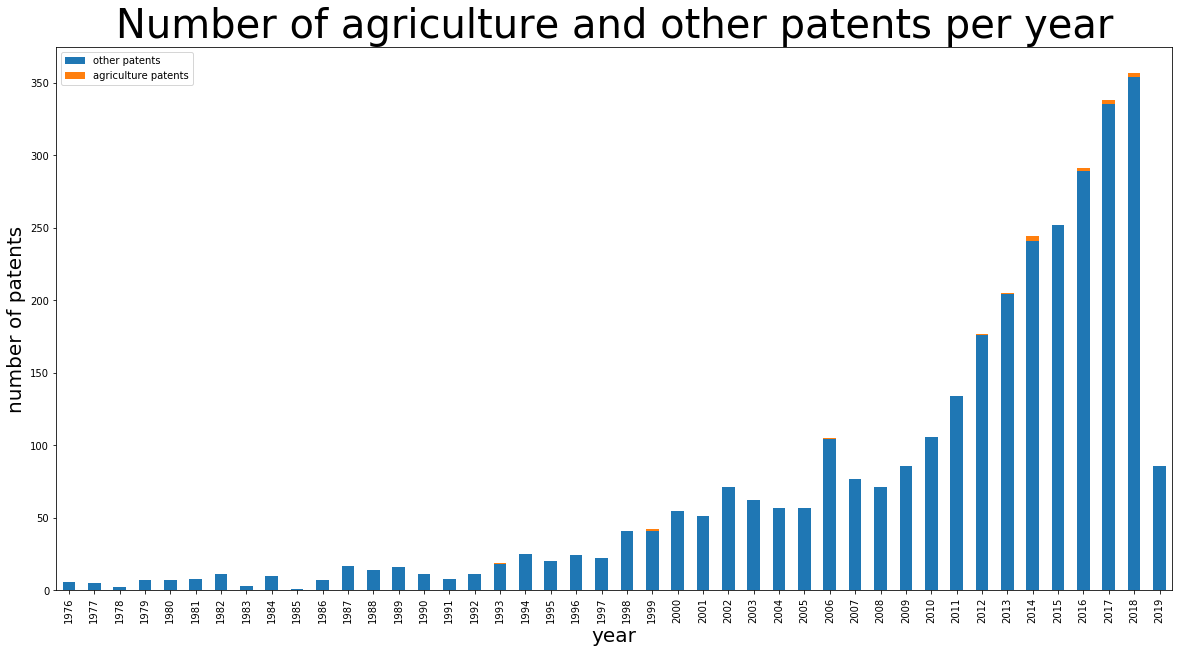

In [34]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

patents.groupby(['First_year','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other patents')
L.get_texts()[1].set_text('agriculture patents')
plt.title('Number of agriculture and other patents per year', fontsize = 40)

plt.savefig('graphics/Patents_total_divided_per_year.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot
